In [236]:
#!pip install tensorflow 

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.datasets import  make_classification

from sklearn.multiclass import OneVsRestClassifier
import scipy as sc
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import scipy as sc
from sklearn.ensemble import VotingClassifier
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [238]:
def score_f1(y,y_pred):#Fonction qui renvoie le score F_1 par classe puis le score F_1 global en fonction du poids des classes
    f_1=f1_score(y,y_pred,average=None)
    f_1=np.round(f_1,3)
    
    print("Le score F_1 pour la classe 1 est de ",f_1[0])
    print("Le score F_1 pour la classe 2 est de ",f_1[1])
    print("Le score F_1 pour la classe 3 est de ",f_1[2])
    print("Le score F_1 pour la classe 4 est de ",f_1[3])
    
    print()
    f_1_glob=np.round(f1_score(y,y_pred,average='weighted'),3)
    print("Le score F_1 global (en prenant en compte la taille des classes) est de ",f_1_glob)
    return

def matrice_conf(y,y_pred): #Fonction qui affiche la matrice de confusion
    print()
    print("La matrice de confusion : ")
    print()
    cf=metrics.confusion_matrix(y,y_pred)
    sns.heatmap(cf,annot=True,cmap='Greens',fmt='g')
    return

def sur_apprentissage(y,model,train): #Fonction pour mesurer l'apprentissage d'un modèle (overfitting par exemple)
    print()
    print("Apprentissage sur l'ensemble train : ")
    pred=model.predict(train)
    f_1=f1_score(y,pred,average=None)
    f_1=np.round(f_1,2)
    print("Score F_1 par classe sur l'ensemble d'apprentissage : ",f_1)
    
    f_1_glob=np.round(f1_score(y,pred,average='weighted'),2)
    print("Le score F_1 global sur l'ensemble d'apprentissage :",f_1_glob)

    
def plot_multiclass_roc(clf, X_test, y_test, n_classes,X_train,y_train): #Fonction trouvé sur internet 
    #affiche les courbes roc-auc pour chaque classe
    #Tres intéressant pour calculer l'apprentissage de chaque classe pour un modèle

    clf=OneVsRestClassifier(clf)
    clf.fit(X_train,y_train)
    y_score = clf.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC-AUC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    return

def total_purchase_amount(data):
    return data['PURCHASES'] + data['ONEOFF_PURCHASES']
def credit_card_usage_frequency(data):
    return data['PURCHASES_TRX'] / (data['PURCHASES_TRX'] + data['CASH_ADVANCE_TRX'])
def installment_purchase_frequency(data):
    return data['INSTALLMENTS_PURCHASES'] / data['PURCHASES']

In [239]:
df = pd.read_csv('../data/train/train.csv')
df = df[df.columns[:]]
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_result
0,4700.106602,1.000000,2570.00,492.46,2077.54,124.563782,0.750000,0.166667,0.666667,0.166667,2,40,4500.0,3259.958288,5620.295192,0.0,12,Cluster 3.0
1,1114.506863,1.000000,602.07,0.00,602.07,0.000000,1.000000,0.000000,0.833333,0.000000,0,15,1800.0,676.487532,248.438014,0.0,12,Cluster 3.0
2,31.050921,1.000000,446.05,0.00,446.05,0.000000,1.000000,0.000000,0.909091,0.000000,0,11,1000.0,387.745745,158.394845,1.0,11,Cluster 3.0
3,2075.637866,0.454545,0.00,0.00,0.00,4573.876388,0.000000,0.000000,0.000000,0.083333,1,0,7500.0,1146.220278,1448.097316,0.0,12,Cluster 2.0
4,8465.740449,1.000000,1345.81,226.00,1119.81,3429.450339,0.916667,0.333333,0.666667,0.666667,25,33,9500.0,2069.156797,2410.701385,0.0,12,Cluster 4.0


In [240]:
# Mélanger aléatoirement les données
#data = df.sample(frac=1)

# Diviser les données en ensembles de train et de test
#train_data, test_data = train_test_split(data, test_size=0.80)

# Enregistrer les ensembles de train et de test dans des fichiers CSV séparés
#train_data.to_csv('/content/drive/MyDrive/Projets AKILI/Classification_de_clients/data/train/train.csv', index=False)
#test_data.to_csv('/content/drive/MyDrive/Projets AKILI/Classification_de_clients/data/test/test.csv', index=False)

In [241]:
total_purchase_amount_ = [i for i in total_purchase_amount(df)]
df["TOTAL_PURCHASE_AMOUNT"] = total_purchase_amount_

credit_card_usage_frequency_ = [i for i in credit_card_usage_frequency(df)]
df["CREDIT_CARD_USE_FREQUZNCY"] = credit_card_usage_frequency_

installment_purchase_frequency_ = [i for i in installment_purchase_frequency(df)]
df["INSTALLMENT_PURCHASE_FREQUENCY"] = installment_purchase_frequency_
df["INSTALLMENT_PURCHASE_FREQUENCY"] = df["INSTALLMENT_PURCHASE_FREQUENCY"].fillna(df["INSTALLMENT_PURCHASE_FREQUENCY"].median())

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_result,TOTAL_PURCHASE_AMOUNT,CREDIT_CARD_USE_FREQUZNCY,INSTALLMENT_PURCHASE_FREQUENCY
0,4700.106602,1.000000,2570.00,492.46,2077.54,124.563782,0.750000,0.166667,0.666667,0.166667,...,40,4500.0,3259.958288,5620.295192,0.0,12,Cluster 3.0,3062.46,0.952381,0.808381
1,1114.506863,1.000000,602.07,0.00,602.07,0.000000,1.000000,0.000000,0.833333,0.000000,...,15,1800.0,676.487532,248.438014,0.0,12,Cluster 3.0,602.07,1.000000,1.000000
2,31.050921,1.000000,446.05,0.00,446.05,0.000000,1.000000,0.000000,0.909091,0.000000,...,11,1000.0,387.745745,158.394845,1.0,11,Cluster 3.0,446.05,1.000000,1.000000
3,2075.637866,0.454545,0.00,0.00,0.00,4573.876388,0.000000,0.000000,0.000000,0.083333,...,0,7500.0,1146.220278,1448.097316,0.0,12,Cluster 2.0,0.00,0.000000,0.545646
4,8465.740449,1.000000,1345.81,226.00,1119.81,3429.450339,0.916667,0.333333,0.666667,0.666667,...,33,9500.0,2069.156797,2410.701385,0.0,12,Cluster 4.0,1571.81,0.568966,0.832071


In [242]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,1790.0,1504.513757,1949.710152,0.000000,111.208761,857.578117,2043.487539,15155.532860
BALANCE_FREQUENCY,1790.0,0.873051,0.240067,0.000000,0.857143,1.000000,1.000000,1.000000
PURCHASES,1790.0,908.254872,1833.624734,0.000000,45.650000,351.115000,1060.272500,40040.710000
ONEOFF_PURCHASES,1790.0,522.744771,1308.797759,0.000000,0.000000,18.880000,504.422500,24543.520000
INSTALLMENTS_PURCHASES,1790.0,385.920799,836.413856,0.000000,0.000000,84.775000,453.967500,15497.190000
CASH_ADVANCE,1790.0,1049.872305,2252.947326,0.000000,0.000000,0.000000,1168.540745,26268.699890
PURCHASES_FREQUENCY,1790.0,0.485722,0.396651,0.000000,0.083333,0.454545,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,1790.0,0.194313,0.293450,0.000000,0.000000,0.083333,0.250000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1790.0,0.358082,0.394804,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,1790.0,0.136170,0.199086,0.000000,0.000000,0.000000,0.250000,1.250000


In [243]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
cluster_result                      0
TOTAL_PURCHASE_AMOUNT               0
CREDIT_CARD_USE_FREQUZNCY           0
INSTALLMENT_PURCHASE_FREQUENCY      0
dtype: int64

In [244]:
df['cluster_result'] = df['cluster_result'].replace({'Cluster 1.0': 1, 'Cluster 2.0': 2, 'Cluster 3.0': 3, 'Cluster 4.0': 4})
plt2=sns.catplot(x="cluster_result", kind="count", palette="ch:.25", data=df,legend_out=True)
plt2.set_xticklabels(["Cluster 1.0","Cluster 2.0","Cluster 3.0","Cluster 4.0"])

Le score F_1 pour la classe 1 est de  0.8
Le score F_1 pour la classe 2 est de  0.844
Le score F_1 pour la classe 3 est de  0.844
Le score F_1 pour la classe 4 est de  0.778

Le score F_1 global (en prenant en compte la taille des classes) est de  0.834

Apprentissage sur l'ensemble train : 
Score F_1 par classe sur l'ensemble d'apprentissage :  [1. 1. 1. 1.]
Le score F_1 global sur l'ensemble d'apprentissage : 1.0

La matrice de confusion : 



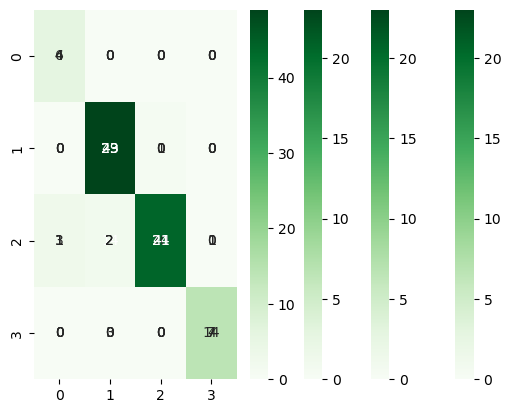

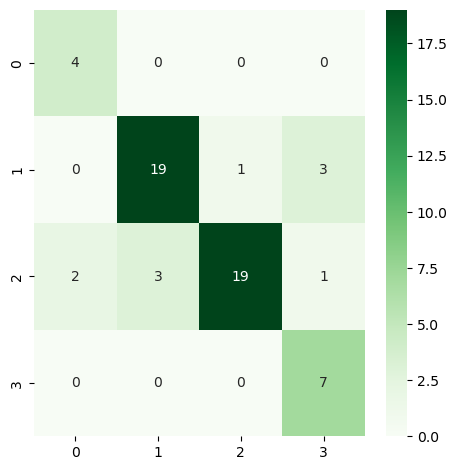

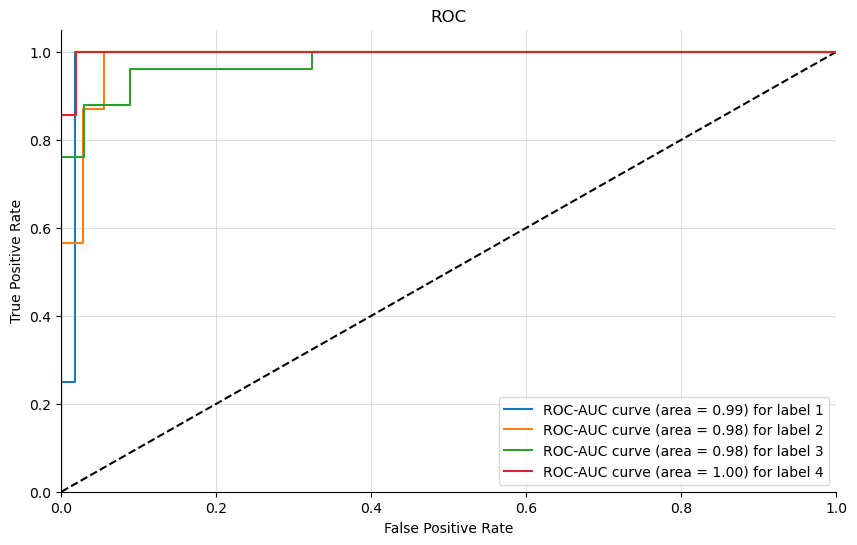

In [245]:
# Make a copy of the original data frame
df_copy = df.copy()

# Drop the target variable from the copy
X = df_copy.drop("cluster_result", axis=1)
y = df_copy["cluster_result"]

# Standardize the features
X[X.columns] = StandardScaler().fit_transform(X)

# Instantiate the KFold object with 10 folds
kf = KFold(n_splits=30)

# Loop over the folds
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    # Get the training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Rebalance the classes in the training set
    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train and test the model with the rebalanced data
rfB = RandomForestClassifier(n_estimators=15000)#On crée notre RandomForest
rfB.fit(X_train_resampled,y_train_resampled)#On la fit à nos données
rfB_pred =rfB.predict(X_test)# On prédit nos données

score_f1(y_test,rfB_pred) #Score
sur_apprentissage(y_train_resampled,rfB,X_train_resampled) #Overfitting
matrice_conf(y_test,rfB_pred) #Matrice de confusion
plot_multiclass_roc(RandomForestClassifier(n_estimators=15000), X_test, y_test,4,X_train_resampled,y_train_resampled)

In [246]:
# Extract feature importances
importances = rfB.feature_importances_

# Get feature names from the dataset
feature_names = list(X_train_resampled.columns)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))


Feature ranking:
1. feature 11 (0.105143) - PURCHASES_TRX
2. feature 2 (0.104258) - PURCHASES
3. feature 17 (0.099634) - TOTAL_PURCHASE_AMOUNT
4. feature 5 (0.097347) - CASH_ADVANCE
5. feature 6 (0.092127) - PURCHASES_FREQUENCY
6. feature 18 (0.072072) - CREDIT_CARD_USE_FREQUZNCY
7. feature 10 (0.067131) - CASH_ADVANCE_TRX
8. feature 9 (0.055901) - CASH_ADVANCE_FREQUENCY
9. feature 0 (0.051496) - BALANCE
10. feature 13 (0.045761) - PAYMENTS
11. feature 3 (0.045547) - ONEOFF_PURCHASES
12. feature 4 (0.035101) - INSTALLMENTS_PURCHASES
13. feature 12 (0.030621) - CREDIT_LIMIT
14. feature 14 (0.026302) - MINIMUM_PAYMENTS
15. feature 8 (0.025687) - PURCHASES_INSTALLMENTS_FREQUENCY
16. feature 7 (0.020104) - ONEOFF_PURCHASES_FREQUENCY
17. feature 19 (0.008075) - INSTALLMENT_PURCHASE_FREQUENCY
18. feature 1 (0.007185) - BALANCE_FREQUENCY
19. feature 15 (0.006967) - PRC_FULL_PAYMENT
20. feature 16 (0.003541) - TENURE


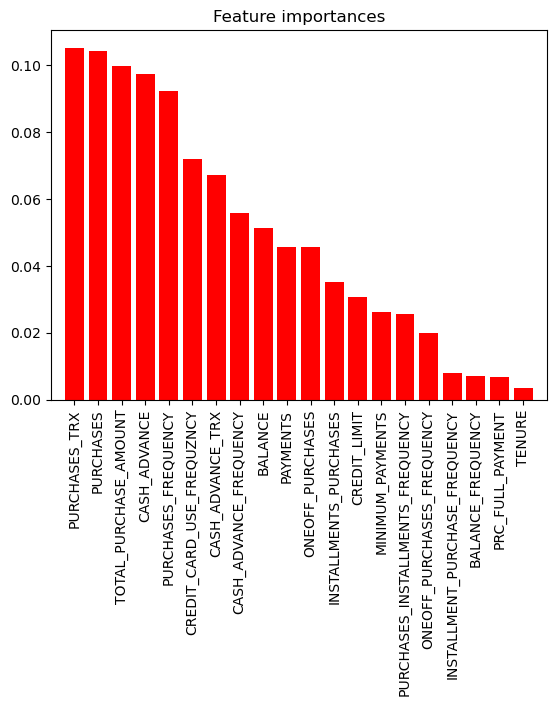

In [247]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_resampled.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train_resampled.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, X_train_resampled.shape[1]])
plt.show()

In [248]:
cols = ['PURCHASES', 'PURCHASES_TRX', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'CREDIT_CARD_USE_FREQUZNCY', 'CASH_ADVANCE_TRX','ONEOFF_PURCHASES', 
        'CASH_ADVANCE_FREQUENCY', 'BALANCE', 'PAYMENTS', 'INSTALLMENTS_PURCHASES', 'CREDIT_LIMIT', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'TOTAL_PURCHASE_AMOUNT',
        'MINIMUM_PAYMENTS', 'ONEOFF_PURCHASES_FREQUENCY', 'PRC_FULL_PAYMENT', 'BALANCE_FREQUENCY','INSTALLMENT_PURCHASE_FREQUENCY', 'TENURE']

Le score F_1 pour la classe 1 est de  0.8
Le score F_1 pour la classe 2 est de  0.844
Le score F_1 pour la classe 3 est de  0.844
Le score F_1 pour la classe 4 est de  0.778

Le score F_1 global (en prenant en compte la taille des classes) est de  0.834

Apprentissage sur l'ensemble train : 
Score F_1 par classe sur l'ensemble d'apprentissage :  [1. 1. 1. 1.]
Le score F_1 global sur l'ensemble d'apprentissage : 1.0

La matrice de confusion : 



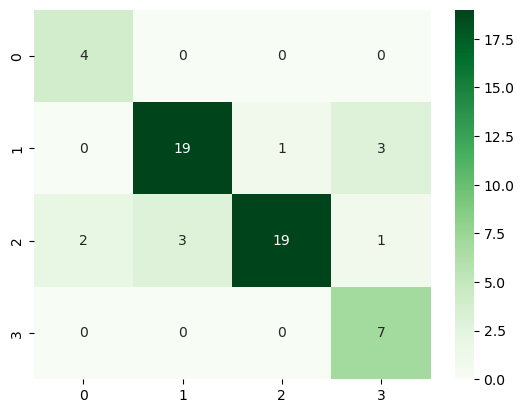

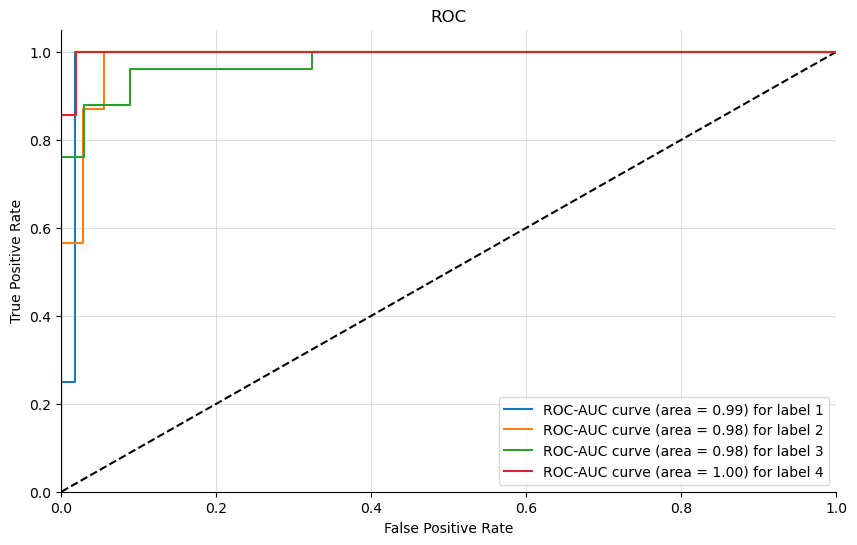

In [249]:
# Make a copy of the original data frame
df_copy = df.copy()

# Drop the target variable from the copy
X = df_copy.drop("cluster_result", axis=1)
y = df_copy["cluster_result"]

# Standardize the features
X[cols] = StandardScaler().fit_transform(X[cols])

# Instantiate the KFold object with 10 folds
kf = KFold(n_splits=30)

# Loop over the folds
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    # Get the training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Rebalance the classes in the training set
    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train and test the model with the rebalanced data
rfB = RandomForestClassifier(n_estimators=15000)#On crée notre RandomForest
rfB.fit(X_train_resampled,y_train_resampled)#On la fit à nos données
rfB_pred =rfB.predict(X_test)# On prédit nos données

score_f1(y_test,rfB_pred) #Score
sur_apprentissage(y_train_resampled,rfB,X_train_resampled) #Overfitting
matrice_conf(y_test,rfB_pred) #Matrice de confusion
plot_multiclass_roc(RandomForestClassifier(n_estimators=15000), X_test, y_test,4,X_train_resampled,y_train_resampled)

In [250]:
# Sérialiser le modèle avec pickle
with open('../models/RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(rfB, f)

Le score F_1 pour la classe 1 est de  0.727
Le score F_1 pour la classe 2 est de  0.894
Le score F_1 pour la classe 3 est de  0.837
Le score F_1 pour la classe 4 est de  0.824

Le score F_1 global (en prenant en compte la taille des classes) est de  0.85

Apprentissage sur l'ensemble train : 
Score F_1 par classe sur l'ensemble d'apprentissage :  [1. 1. 1. 1.]
Le score F_1 global sur l'ensemble d'apprentissage : 1.0

La matrice de confusion : 



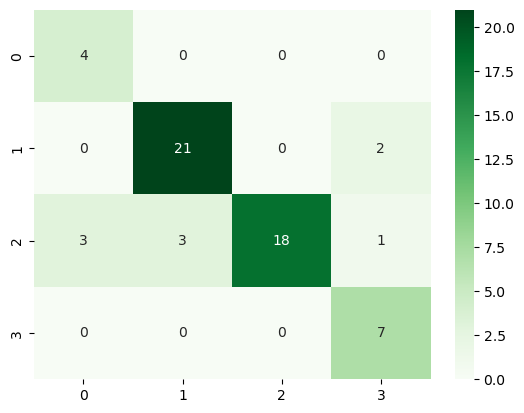

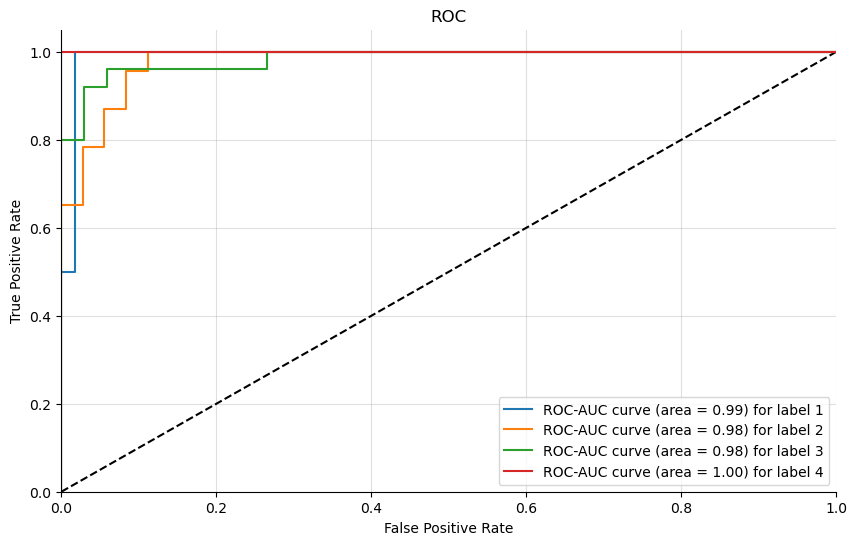

In [251]:
# Make a copy of the original data frame
df_copy = df.copy()

# Drop the target variable from the copy
X = df_copy.drop("cluster_result", axis=1)
y = df_copy["cluster_result"]

# Standardize the features
X[cols] = StandardScaler().fit_transform(X[cols])

# Instantiate the KFold object with 10 folds
kf = KFold(n_splits=30)

# Loop over the folds
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    # Get the training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Rebalance the classes in the training set
    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train and test the model with the rebalanced data
etc = ExtraTreesClassifier(n_estimators=15000)
etc.fit(X_train_resampled, y_train_resampled)

y_etc=etc.predict(X_test)
score_f1(y_test,y_etc)
sur_apprentissage(y_train_resampled,etc,X_train_resampled) #Overfitting
matrice_conf(y_test,y_etc) #Matrice de confusion
plot_multiclass_roc(ExtraTreesClassifier(n_estimators=15000), X_test, y_test,4,X_train_resampled,y_train_resampled)

In [252]:
# Sérialiser le modèle avec pickle
with open('../models/ExtraTreesClassifier.pkl', 'wb') as f:
    pickle.dump(etc, f)

Le score F_1 pour la classe 1 est de  0.889
Le score F_1 pour la classe 2 est de  0.913
Le score F_1 pour la classe 3 est de  0.894
Le score F_1 pour la classe 4 est de  0.875

Le score F_1 global (en prenant en compte la taille des classes) est de  0.899

Apprentissage sur l'ensemble train : 
Score F_1 par classe sur l'ensemble d'apprentissage :  [1.   0.99 0.99 1.  ]
Le score F_1 global sur l'ensemble d'apprentissage : 1.0

La matrice de confusion : 



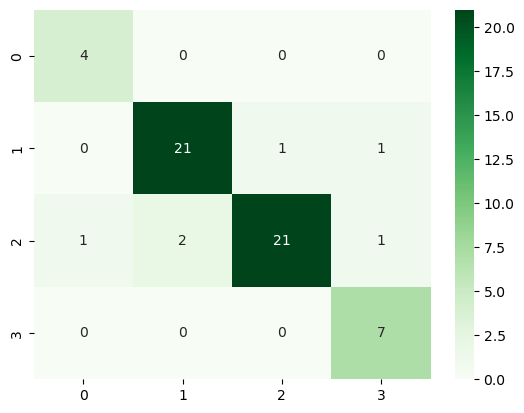

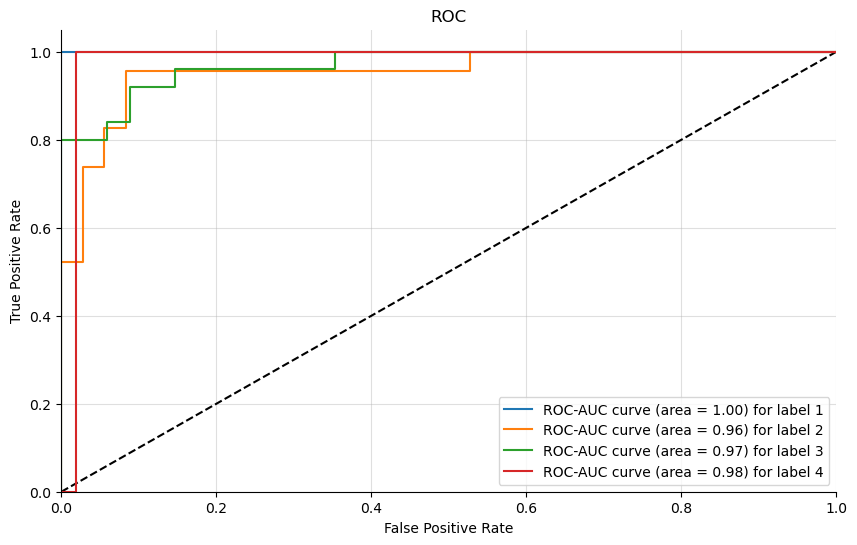

In [253]:
# Make a copy of the original data frame
df_copy = df.copy()

# Drop the target variable from the copy
X = df_copy.drop("cluster_result", axis=1)
y = df_copy["cluster_result"]

# Standardize the features
X[cols] = StandardScaler().fit_transform(X[cols])

# Instantiate the KFold object with 10 folds
kf = KFold(n_splits=30)

# Loop over the folds
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    # Get the training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Rebalance the classes in the training set
    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train and test the model with the rebalanced data
pipeline=make_pipeline(LogisticRegression())

param_distributions = [{'logisticregression__C': sc.stats.expon(scale=100)}]
rs = RandomizedSearchCV(estimator=pipeline, param_distributions = param_distributions,cv = 10, scoring = 'roc_auc_ovr_weighted', refit = True, n_jobs = 1,random_state=1)

rs.fit(X_train_resampled, y_train_resampled)
y_pred=rs.predict(X_test)
score_f1(y_test,y_pred)
sur_apprentissage(y_train_resampled,rs,X_train_resampled) #Overfitting
matrice_conf(y_test,y_pred) #Matrice de confusion
plot_multiclass_roc(rs, X_test, y_test,4,X_train_resampled,y_train_resampled)

In [254]:
# Sérialiser le modèle avec pickle
with open('../models/LogisticRegression.pkl', 'wb') as f:
    pickle.dump(rs, f)

In [255]:
# Make a copy of the original data frame
df_copy = df.copy()

# Drop the target variable from the copy
X = df_copy.drop("cluster_result", axis=1)
y = df_copy["cluster_result"]

# Standardize the features
X[cols] = StandardScaler().fit_transform(X[cols])

# Instantiate the KFold object with 10 folds
kf = KFold(n_splits=30)

# Loop over the folds
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    # Get the training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Rebalance the classes in the training set
    rus = RandomUnderSampler(random_state=52)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train and test the model with the rebalanced data
svm_linear = SVC(kernel='poly')
svm_linear.fit(X_train_resampled,y_train_resampled)#On la fit à nos données

# Train and test an SVM model with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train_resampled,y_train_resampled)

# Train and test an SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=0.1)
svm_rbf.fit(X_train_resampled,y_train_resampled)

# Train and test an SVM model with a sigmoid kernel
svm_sigmoid = SVC(kernel='sigmoid', coef0=0.5)
svm_sigmoid.fit(X_train_resampled,y_train_resampled)

svm_pred =svm_poly.predict(X_test)# On prédit nos données

score_f1(y_test,rfB_pred) #Score
sur_apprentissage(y_train_resampled,svm_poly,X_train_resampled) #Overfitting
matrice_conf(y_test,svm_pred) #Matrice de confusion
#plot_multiclass_roc(svm, X_test, y_test,4,X_train_resampled,y_train_resampled)

Le score F_1 pour la classe 1 est de  0.8
Le score F_1 pour la classe 2 est de  0.844
Le score F_1 pour la classe 3 est de  0.844
Le score F_1 pour la classe 4 est de  0.778

Le score F_1 global (en prenant en compte la taille des classes) est de  0.834

Apprentissage sur l'ensemble train : 
Score F_1 par classe sur l'ensemble d'apprentissage :  [0.98 0.69 0.62 0.74]
Le score F_1 global sur l'ensemble d'apprentissage : 0.75

La matrice de confusion : 



In [256]:
# Sérialiser le modèle avec pickle
with open('../models/SVC.pkl', 'wb') as f:
    pickle.dump(svm_poly, f)

In [257]:
# Make a copy of the original data frame
df_copy = df.copy()

# Drop the target variable from the copy
X = df_copy.drop("cluster_result", axis=1)
y = df_copy["cluster_result"]

# Standardize the features
X[cols] = StandardScaler().fit_transform(X[cols])

# Instantiate the KFold object with 10 folds
kf = KFold(n_splits=30)

# Loop over the folds
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    # Get the training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Rebalance the classes in the training set
    rus = RandomUnderSampler(random_state=52)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train and test the model with the rebalanced data
# Instanciation du modèle et entraînement sur les données d'entraînement
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled,y_train_resampled)

knn_pred =knn.predict(X_test)# On prédit nos données

score_f1(y_test,knn_pred) #Score
sur_apprentissage(y_train_resampled,knn,X_train_resampled) #Overfitting
matrice_conf(y_test,knn_pred) #Matrice de confusion
#plot_multiclass_roc(svm, X_test, y_test,4,X_train_resampled,y_train_resampled)

Le score F_1 pour la classe 1 est de  0.889
Le score F_1 pour la classe 2 est de  0.958
Le score F_1 pour la classe 3 est de  0.913
Le score F_1 pour la classe 4 est de  0.933

Le score F_1 global (en prenant en compte la taille des classes) est de  0.931

Apprentissage sur l'ensemble train : 
Score F_1 par classe sur l'ensemble d'apprentissage :  [0.96 0.95 0.92 0.96]
Le score F_1 global sur l'ensemble d'apprentissage : 0.95

La matrice de confusion : 



In [258]:
# Sérialiser le modèle avec pickle
with open('../models/KNN.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [259]:
vcB = VotingClassifier( #On crée notre VotingClassifier
 estimators=[('rfB',rfB),("rs",rs),("etc",etc),("svm_poly",svm_poly),("knn",knn)],
    voting='hard')
df_copy = df.copy()

# Drop the target variable from the copy
X = df_copy.drop("cluster_result", axis=1)
y = df_copy["cluster_result"]

# Standardize the features
X[cols] = StandardScaler().fit_transform(X[cols])

# Instantiate the KFold object with 10 folds
kf = KFold(n_splits=15)

# Loop over the folds
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    # Get the training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Rebalance the classes in the training set
    rus = RandomUnderSampler(random_state=0)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
vcB.fit(X_train_resampled,y_train_resampled) #On entraine notre modèle

vcB_pred =vcB.predict(X_test)# On prédit nos données

score_f1(y_test,vcB_pred) #Score
sur_apprentissage(y_train_resampled,vcB,X_train_resampled) #Overfitting
matrice_conf(y_test,vcB_pred) #Matrice de confusion

Le score F_1 pour la classe 1 est de  0.8
Le score F_1 pour la classe 2 est de  0.97
Le score F_1 pour la classe 3 est de  0.936
Le score F_1 pour la classe 4 est de  1.0

Le score F_1 global (en prenant en compte la taille des classes) est de  0.951

Apprentissage sur l'ensemble train : 
Score F_1 par classe sur l'ensemble d'apprentissage :  [1. 1. 1. 1.]
Le score F_1 global sur l'ensemble d'apprentissage : 1.0

La matrice de confusion : 



In [260]:
# Sérialiser le modèle avec pickle
with open('../models/VotingClassifier.pkl', 'wb') as f:
    pickle.dump(rs, f)

In [277]:
test_data = pd.read_csv("../data/test/test.csv")
total_purchase_amount_ = [i for i in total_purchase_amount(test_data)]
test_data["TOTAL_PURCHASE_AMOUNT"] = total_purchase_amount_

credit_card_usage_frequency_ = [i for i in credit_card_usage_frequency(test_data)]
test_data["CREDIT_CARD_USE_FREQUZNCY"] = credit_card_usage_frequency_

installment_purchase_frequency_ = [i for i in installment_purchase_frequency(test_data)]
test_data["INSTALLMENT_PURCHASE_FREQUENCY"] = installment_purchase_frequency_
test_data["INSTALLMENT_PURCHASE_FREQUENCY"] = test_data["INSTALLMENT_PURCHASE_FREQUENCY"].fillna(test_data["INSTALLMENT_PURCHASE_FREQUENCY"].median())

test_data[100:105]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_result,TOTAL_PURCHASE_AMOUNT,CREDIT_CARD_USE_FREQUZNCY,INSTALLMENT_PURCHASE_FREQUENCY
100,18.180646,1.000000,220.06,0.00,220.06,0.000000,1.0,0.000000,1.0,0.000000,...,12,1000.0,217.276088,140.596138,0.7,12,Cluster 3.0,220.06,1.000000,1.000000
101,3619.986054,1.000000,0.00,0.00,0.00,1483.636800,0.0,0.000000,0.0,0.750000,...,0,13000.0,942.812569,920.525945,0.0,12,Cluster 4.0,0.00,0.000000,0.481001
102,2354.125834,1.000000,5351.58,3824.94,1526.64,156.148653,1.0,0.333333,1.0,0.083333,...,21,10000.0,4452.753075,562.102772,0.0,12,Cluster 1.0,9176.52,0.954545,0.285269
103,40.069534,0.909091,833.29,833.29,0.00,0.000000,1.0,1.000000,0.0,0.000000,...,12,7000.0,766.596225,112.992397,0.3,12,Cluster 3.0,1666.58,1.000000,0.000000
104,1631.385579,1.000000,0.00,0.00,0.00,1755.575907,0.0,0.000000,0.0,0.083333,...,0,3500.0,398.316441,566.309710,0.0,12,Cluster 2.0,0.00,0.000000,0.481001


In [293]:
with open("../models/RandomForestClassifier.pkl","rb") as f:
    modele = pickle.load(f)

In [294]:
modele.predict(test_data[cols][100:105])

array([1, 1, 1, 4, 1], dtype=int64)